
# k Nearest Neighbors Classification with sklearn


Usage of Nearest Neighbors classification.
It will obtain the train/test accuracy and plot the decision boundaries for each class. 

It uses the ASTER satellite imaginery data of forested area in Japan, mapped with different forest types based on their spectral characteristics at visible-to-near infrared wavelengths:
https://archive.ics.uci.edu/ml/datasets/Forest+type+mapping



In [34]:
#import libraries for ML and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from matplotlib.colors import ListedColormap
from sklearn import neighbors

## 1.Import Japanese Forest Dataset

In [35]:
# importing the Forest Dataset
df = pd.read_csv('../forest_dataset.csv') #Dataframe for training.csv

#Extract the training targets
y_df = df[['class']]
y=y_df.values
y=y.reshape(-1)
print(type(y),"y:",y.shape)
#print(y)

#Extract the training data
df.drop(['class'],1,inplace=True)
X = df.values

print(type(X),"X:",X.shape)
#print(X)

<class 'numpy.ndarray'> y: (523,)
<class 'numpy.ndarray'> X: (523, 27)


In [36]:
#Split Dataset into Trainset and Testset 
#80 % for training and 20% for testting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Obtain train/test  accuracy

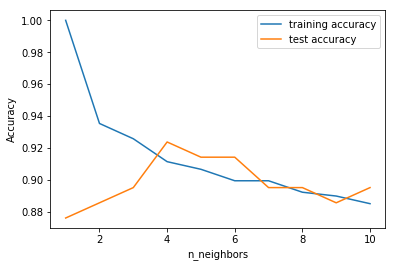

In [37]:
# Obtain the accuracy of train/test process varying the parameter K

#Initialize the lists
training_accuracy = []
test_accuracy = []

%matplotlib inline
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # builds a classification model
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #  write the "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # write the  "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 3. Create plotting function for Cross-validation & Training Score

In [40]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## 4. Obtain Cross-validation & Training Score 

<module 'matplotlib.pyplot' from 'C:\\Users\\gollo\\Miniconda3\\envs\\tarea2\\lib\\site-packages\\matplotlib\\pyplot.py'>

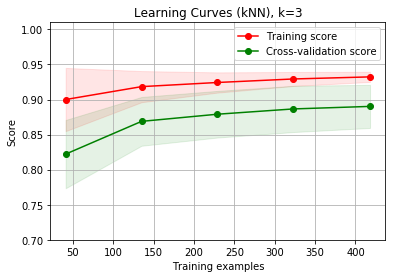

In [39]:
# Obtain the cross-validation and training accuracy with the best parameter K found 
title = "Learning Curves (kNN), k=3"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator =neighbors.KNeighborsClassifier(n_neighbors=3)    
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

## 5. Obtain decision boundaries with k=3

In [26]:
# Choose how many neighbors (k)
n_neighbors = 3

# Take only the first two features. 
X = X[:, :2]   #Using b1 and b2 features
print(type(X),"X:",X.shape)
#print(X)

h = .02  # step size in the mesh

<class 'numpy.ndarray'> X: (523, 2)


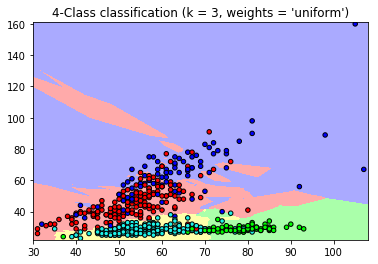

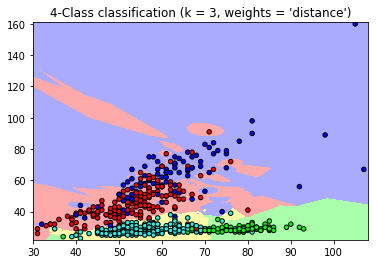

In [27]:
# Create color maps for dwaiio
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#1df3e9'])


for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

For more information about kNN classification, visit the following webpage: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html